In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw = pd.read_csv(r"globalterrorismdb_0718dist.csv")
#raw = pd.read_csv("https://bit.ly/2TK5Xn5")
raw.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqu� to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
raw.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [4]:
raw.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
raw.shape

(181691, 135)

In [6]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [7]:
raw.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [8]:
# ASKING USER WHETHER TO SAVE THE PLOT ON THE DISK OR NOT 

if (input("Save/download plots? y/n: ").lower()[0] == 'y'):
  save_files = True
  print("\nPlots will be saved/downloaded.")
else:
  save_files = False
  print("Plots will not be saved/downloaded.")

Save/download plots? y/n: y

Plots will be saved/downloaded.


## Based on countries

In [9]:
# Renaming Index to Country Name

country_wise = raw.country_txt.value_counts().reset_index().rename(columns={'index': 'Country Name'})
country_wise.columns.values[1] = 'Count of Attacks'

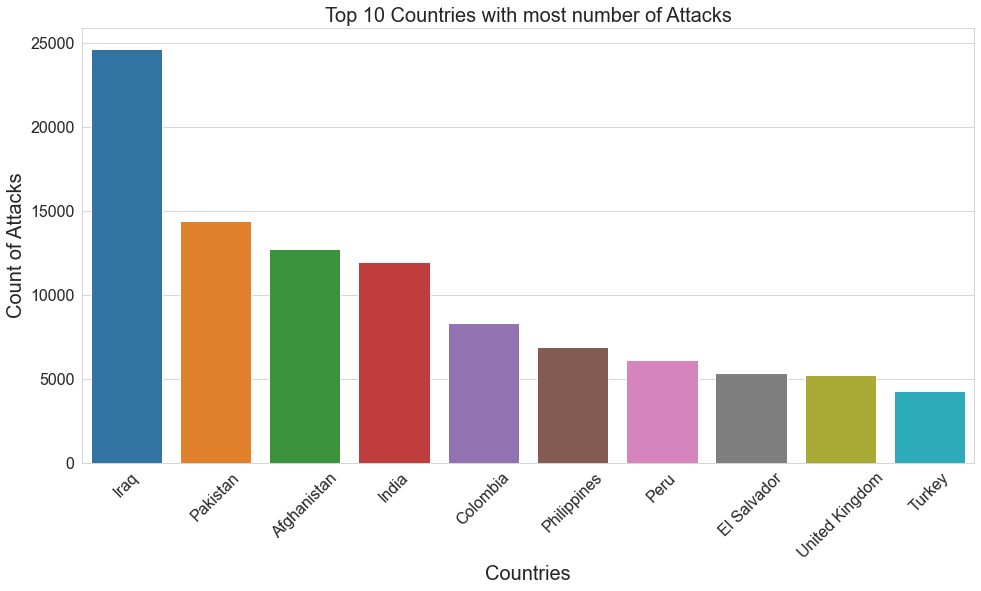

In [28]:
top10 = country_wise.head(10)

sns.set_style('whitegrid')
fig = plt.figure(figsize=(16,8))
sns.barplot(x = "Country Name", y = "Count of Attacks", data = top10)
plt.xlabel("Countries", fontsize = 20)
plt.ylabel("Count of Attacks", fontsize = 20)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.title("Top 10 Countries with most number of Attacks", fontsize = 20)
plt.show()

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/top10AttackedCountries'
  fig.savefig(filename, bbox_inches = 'tight')

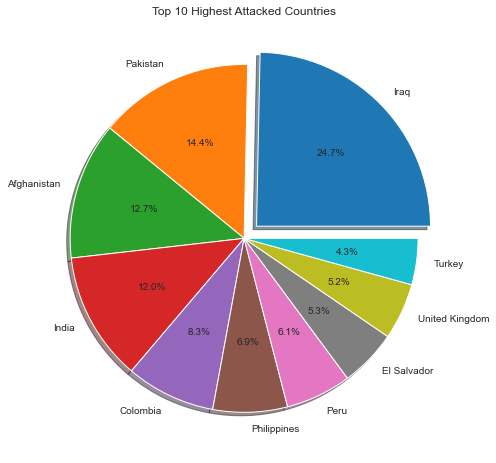

In [29]:
fig = plt.figure(figsize=(20,8))
plt.title('Top 10 Highest Attacked Countries')
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(top10['Count of Attacks'], labels=top10['Country Name'],shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/top10AttackedCountries_Pie'
  fig.savefig(filename, bbox_inches = 'tight')

In [13]:
Total = country_wise['Count of Attacks'].sum()

In [14]:
top10 = country_wise.head(10)['Count of Attacks'].sum()

In [15]:
# Percentage of total attacks in top 10 countries

print((top10/Total)*100,'%')

54.95704245119462 %


## Based on target-type

In [24]:
target_type= raw['targtype1_txt'].value_counts().reset_index().rename(columns={'index': 'Target Types'})

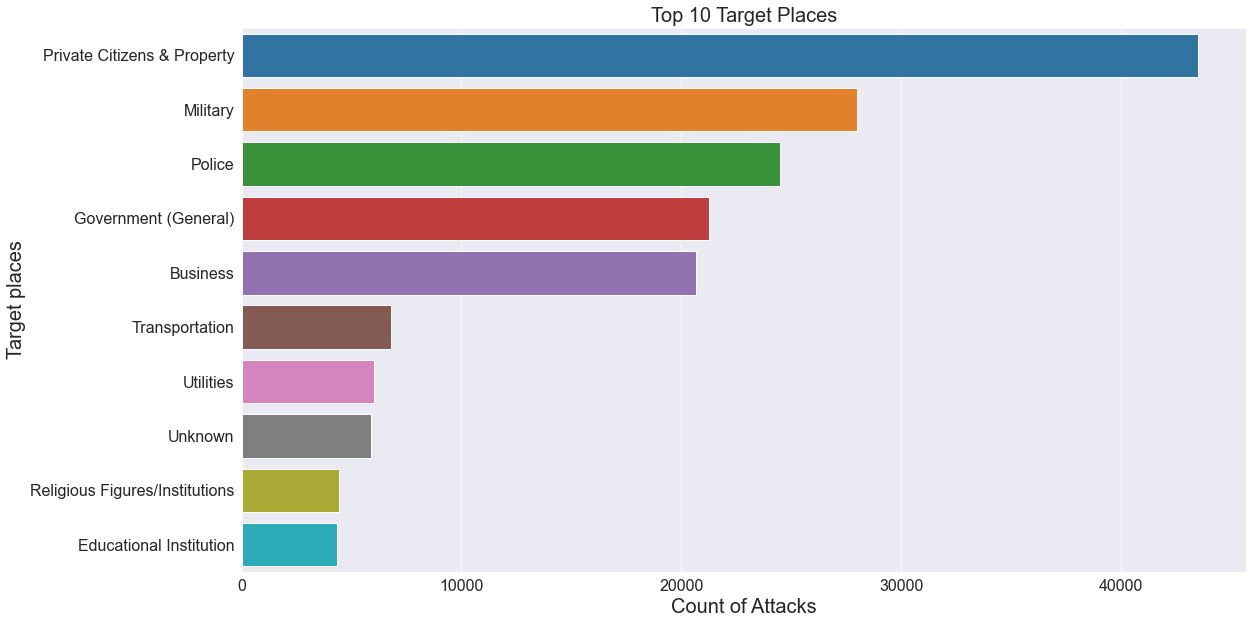

In [32]:
target_type.columns.values[1] = 'Count'

sns.set_style('darkgrid')
fig = plt.figure(figsize=(18,10))
sns.barplot(y = "Target Types", x = "Count", data = target_type.head(10))
plt.xlabel('Count of Attacks', fontsize = 20)
plt.ylabel('Target places', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 10 Target Places', fontsize = 20)
plt.show()
# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/target_type'
  fig.savefig(filename, bbox_inches = 'tight')

## Year-wise attacks

In [33]:
years = raw['iyear'].value_counts().reset_index()
years.columns.values[1] = 'Count of Attacks'
years.head()

,index,Count of Attacks
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900


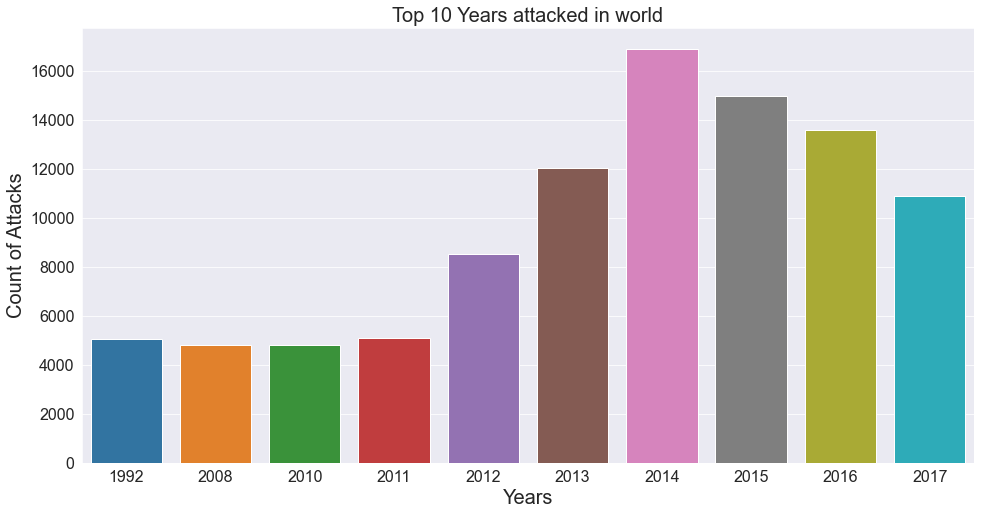

In [36]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(16,8))
sns.barplot(x="index", y="Count of Attacks", data=years.head(10))
plt.ylabel('Count of Attacks', fontsize = 20)
plt.xlabel('Years', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 10 Years attacked in world', fontsize = 20)
plt.show()
# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/year-wise-attacks'
  fig.savefig(filename, bbox_inches = 'tight')